In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import data
airline_data = pd.read_csv('../dataset/airline-passenger-traffic.csv', header=None)
airline_data.columns = ['Date', 'Passengers']
# By default Date column is taken as object so convert to datetime64 datatype
airline_data['Date'] = pd.to_datetime(airline_data['Date'], format="%Y-%m")
# Change the index to Date
airline_data = airline_data.set_index('Date') # what is the advantage
print(airline_data.info())
display(airline_data)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  140 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB
None


,Passengers
Date,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


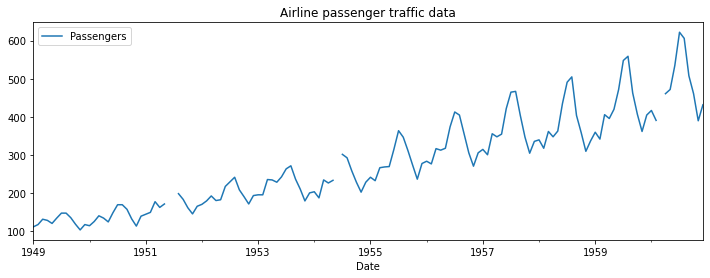

In [3]:
# Time Series Analysis
# Plot time series data
airline_data.plot(figsize=(12,4))
plt.legend(loc='best') # why loc
plt.title('Airline passenger traffic data')
plt.show(block=False) #why block

Missing data is found between 1951 and 1953, 1953 and 1955, 1959 and 1960

> Deltion of missing records can make our dataset more biased and for the smaller dataset, we can't afford to delete them

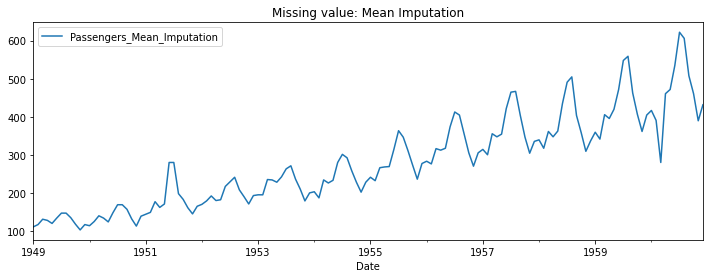

In [4]:
# Missing values handling
# Mean Imputation
# Create new column with imputations
airline_data = airline_data.assign(Passengers_Mean_Imputation = airline_data.Passengers.fillna(airline_data.Passengers.mean()))
airline_data[['Passengers_Mean_Imputation']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title("Missing value: Mean Imputation")
plt.show(block=False)

> Imputing with mean, median and mode reduces the variance in the dataset and it doesn't capture the trend, 

> Imputing the missing values with the next observed value and last observed value can introduce bias in analysis and perform poorly when data has a visible trend

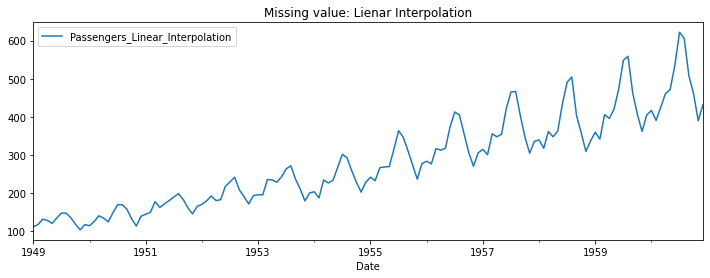

In [5]:
# Linear interpolation
airline_data = airline_data.assign(Passengers_Linear_Interpolation = airline_data.Passengers.interpolate(method="linear"))
airline_data[['Passengers_Linear_Interpolation']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title("Missing value: Lienar Interpolation")
plt.show(block=False)

> Linear interpolation imputes the missing value with an average of previous and next values it only captures the trend but not the seasonality

TODO: Redraw the plots with color differences among existing and imputed data

## Handling outliers
- We are inherintly removing variance

Methods to detect outliers:
1. Extreme value analysis
    -  In Normal distribution or Gaussian distribution, the outliers will lie outside the mean plus or minus 3 times the standard deviation of the data. Since, the 99.7% of the data points are within +- 3 standard deviations, rests are generally considered to be outliers.
2. Box plot
    - In the case of a Non-Gaussian distribution, If the data is above the upper boundary or below the lower boundary of the whiskers, it can be considered as an outlier
    - Boxplot is a graphical method that helps in defining the upper limit and lower limit of whiskers range beyond which any data lying will be considered as outliers.
3. Histogram
    - An outlier lies outside the overall pattern of Histogram distribution as outliers do not follow the pattern of the rest of the data.

Methods to treat outliers:

1. Replace with Mean, Median or Mode
2. Trimming (Removing records) - May not work for time series data
3. Lower and Upper Capping

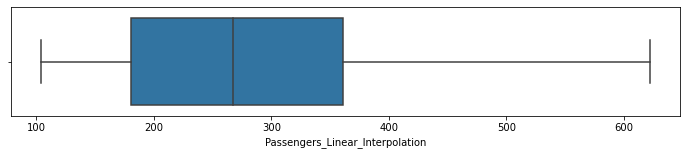

In [6]:
# BOx plot and interquartile range
import seaborn as sns
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(x=airline_data['Passengers_Linear_Interpolation'], whis=1.5)

We see no outliers from the box plot

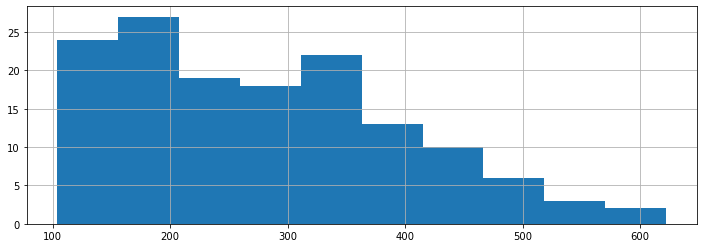

In [7]:
# Histogram plot
fig = airline_data['Passengers_Linear_Interpolation'].hist(figsize=(12,4))

Frequency gradually decreses as we increase in our passenger count data. There is no abnormality in plot

After exploring the dataset we understood that there are no outliers in the dataset.

 

Now that we are done with data cleaning, we can start building models for forecasting the future. But before that, we will understand how a time series can be split into its various components that is the trend, seasonality, and residuals (residual is the part left over after extracting trend and seasonality from the time series).

 

You had learnt that time-series data mostly has two major components - trend and seasonality. If you think about it, the data can be decomposed to extract these two components individually.

 

There are two ways in which the time series data can be decomposed:

- Additive Seasonal Decomposition - the individual components can be added to get the time-series data
- Multiplicative Seasonal Decomposition - the individual components can be multiplied to get the time-series data

## Time series decomposition

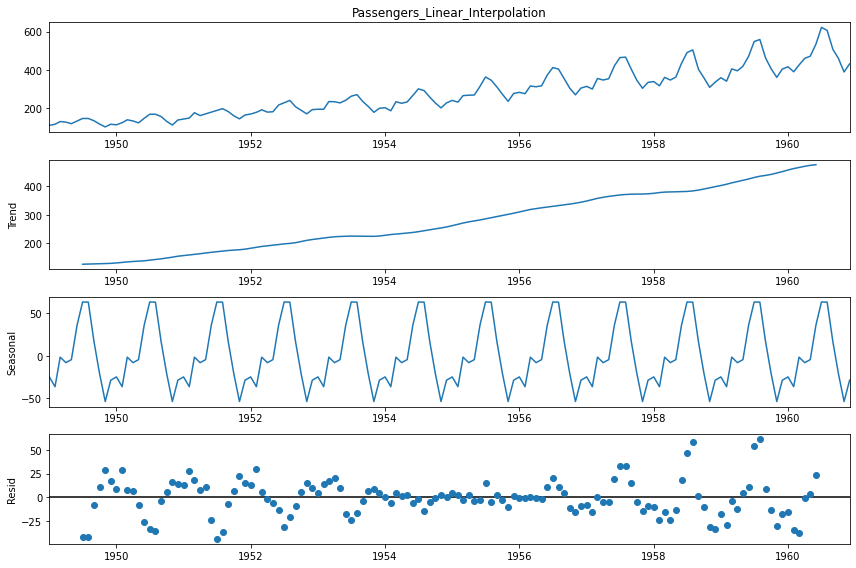

In [8]:
# Additive seasonal decomposition
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(airline_data['Passengers_Linear_Interpolation'], model='additive')
fig = decomposition.plot()
plt.show()

We see residuals plot having pattern between 1958 to 1960

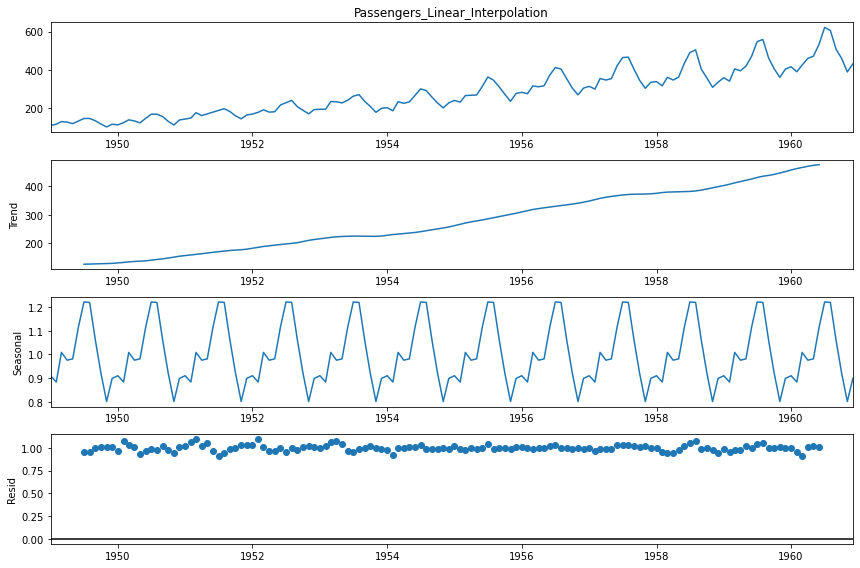

In [9]:
# Multiplicative seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(airline_data['Passengers_Linear_Interpolation'], model='multiplicative')
fig = decomposition.plot()
plt.show()

We see randomness in residuals, so multiplicative method is good

In [10]:
airline_data.to_csv('../dataset/dataanalysis.csv')

1. Additive Seasonal Decomposition

When the magnitude of the seasonal pattern in the data does not directly correlate with the value of the series, the additive seasonal decomposition may be a better choice to split the time series so that the residual does not have any pattern.

2. Multiplicative Seasonal Decomposition

When the magnitude of the seasonal pattern in the data increases with an increase in data values and decreases with a decrease in the data values, the multiplicative seasonal decomposition may be a better choice.

## Summary
Here’s a summary of what you have learnt so far in this session:

1. First, you began by exploring the different applications of forecasting.

2. You then understood that forecasting can be done in two ways:

    1. Qualitative forecasting

    2. Quantitative forecasting

3. After that, you learnt that time series forecasting comes under quantitative forecasting.

4. After getting exposed to the Air Passenger traffic problem statement, you learnt the basic steps for forecasting.

    1. Define the problem

        1. Quantity

        2. Granularity

        3. Frequency

        4. Horizon

    2. Collect the data

        1. Three important characteristics of time series data:

            1. Relevant

            2. Accurate

            3. Long enough

     3. Analyze the data

            1. You analysed the Air Passenger traffic dataset and found that the dataset has missing values.

            2. Then, you learnt the various methods to handle the missing values and imputed the missing values in the Air Passenger traffic dataset.

            3. You also explored some of the methods to detect outliers and understood that Air Passenger traffic dataset does not have any outliers.

            4. You also explored the methods to decompose the time series data into its components.

            5. Additive Seasonal Decomposition

            6. Multiplicative Seasonal Decomposition

            7. We will now learn how to build and evaluate the forecast model. (Upcoming Sessions)

To build Auto Regressive models two conditions has to be satisfied.
1. Stationary
2. Autocorrelation


## Stationary tests
- KPSS test
- ADF test

## Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test - Unit root test

- Null Hypothesis (H0): The series is stationary
    - p-value>0.05
- Alternate Hypothesis (H1): The series is not stationary
    - p-value<=0.05

Unit root test: Can a time series be explained by simple trend or not

In [11]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(airline_data['Passengers_Linear_Interpolation'])
kpss_test

C:\Users\Ganesh\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Ganesh\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(1.0520501504573108,
 0.01,
 14,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [12]:
print('ADF statistic: %f'%kpss_test[0])
print('Critical value @0.05: %0.2f'%kpss_test[3]['5%'])
print('p-value: %f'%kpss_test[1])

ADF statistic: 1.052050
Critical value @0.05: 0.46
p-value: 0.010000


> p-value<=0.05 so we can reject null hypothesis and the series is not stationary

## Augmented Dickey-Fuller (ADF) Test - Unit root test
- Null Hypothesis (H0): The series is not stationary
    - p-value>0.05
- Alternate Hypothesis (H1): The series is stationary
    - p-value<=0.05

In [13]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(airline_data['Passengers_Linear_Interpolation'])
adf_test

(0.8946087940823864,
 0.9930195647605924,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 993.7736365973918)

In [14]:
print('ADF statistic: %f'%adf_test[0])
print('Critical value @0.05: %0.2f'%adf_test[4]['5%'])
print('p-value: %f'%adf_test[1])

ADF statistic: 0.894609
Critical value @0.05: -2.88
p-value: 0.993020


> p-value 0.993>0.05, means null hypothesis is true, so the series is not stationary

> As we have already seen the series is having trend and seasonality, which represents the series is not stationary, the same is concluded using KPSS and ADF tests

## Not stationary to stationary series
- We can build autoregressive models only on stationary data
- Methods
    1. Differencing - Making mean constant (Removes trend and seasonality - When and entire cycle is used for differencing the other cycle, then the seasonality is removed)
        - 1st order differencing
            - calculated by the difference of two consecutive observations of the original time series
        - 2nd order differencing
            - calculated by the difference of two consecutive observations of the 1st order differenced series.
| Original time series | After 1st order differencing | After 2nd order differencing |
| --- | --- | --- |
| 50 |  |  |
| 180 | 130  |  |
| 420 | 240 | 110 |
| 770 | 350 | 110  |
| 1240 | 470 | 120 |
| 1820 | 580 | 110 |
    2. Transformation - Making variance constant (fluctuations should be same/constant, removes sudden fluctuations)
        - Box-cox transformation (power transformation) {Another method called= log transformation also exists}
        
$$ 
y(\lambda)= \begin{cases}\frac{y^{\lambda}-1}{\lambda}, & \text { if } \lambda \neq 0 \\ \log y, & \text { if } \lambda=0\end{cases}
$$
        where y is the original time series and y(λ) is the transformed series. The procedure for the Box-Cox transformation is to find the optimal value of λ between -5 and 5 that minimizes the variance of the transformed data (The formula is not important to remember; the main thing you should know is how to implement this using Python)

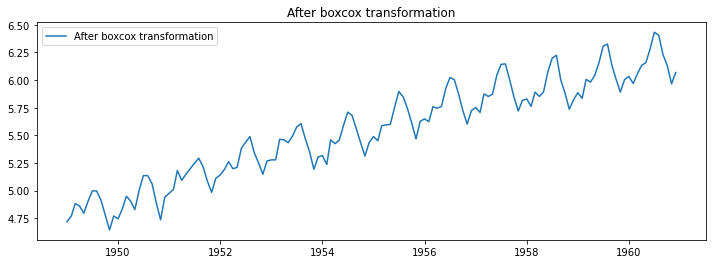

In [15]:
# Box-cox transformation
from scipy.stats import boxcox
airline_data_boxcox = pd.Series(boxcox(airline_data['Passengers_Linear_Interpolation'],lmbda=0),index=airline_data.index)

plt.figure(figsize=(12,4))
plt.plot(airline_data_boxcox, label='After boxcox transformation')
plt.legend(loc='best')
plt.title("After boxcox transformation")
plt.show()

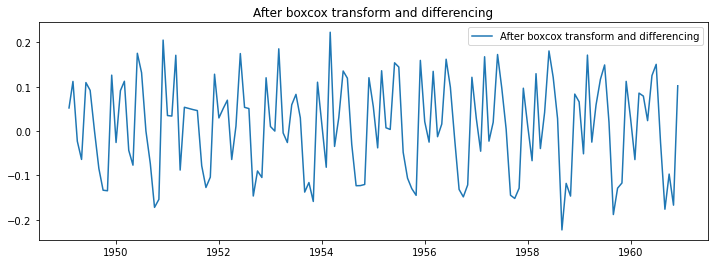

In [16]:
# Differencing
airline_data_boxcox_diff = pd.Series(airline_data_boxcox - airline_data_boxcox.shift(), index=airline_data.index)
airline_data_boxcox_diff.dropna(inplace=True)

plt.figure(figsize=(12,4))
plt.plot(airline_data_boxcox_diff, label='After boxcox transform and differencing')
plt.legend(loc='best')
plt.title('After boxcox transform and differencing')
plt.show()

In [17]:
# ADF test
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(airline_data_boxcox_diff)
display(adf_test)

print('ADF statistic: %f'%adf_test[0])
print('Critical value @0.05: %0.2f'%adf_test[4]['5%'])
print('p-value: %f'%adf_test[1])

(-3.2901138184594134,
 0.015326212237944385,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -438.57103816956396)

ADF statistic: -3.290114
Critical value @0.05: -2.88
p-value: 0.015326


> p-value=0.015326<=0.05 ; So the data is stationary

 Q: Is seasonlaity in time series means the series is not stationary?

## Auto Correlation
Autocorrelation is capturing the relationship between observations $y_{t}$ at time t and $y_{t-k}$ at time k time period before t. In simpler words, autocorrelation helps us to know how a variable is influenced by its own lagged values. 
The autocorrelation function tells about the correlation between an observation with its lagged values. It helps you to determine which lag of the observation is influencing it the most. 

Measuring methods:
1. Auto Correlation Fucntion (ACF)
    - Captures both direct and indirect relationship (transitive correlation) with its lagged values
    <img src="../dataset/ACF3.png" width="300" height="150">
    - We can't differentiate out only the direct relationship using ACF.
2. Partial Auto Correlation Function (PACF)
    - PACF captures only direct relationship between an observation and its lagged value with the relationships of intervening observations removed.
    <img src="../dataset/PACF.png" width="300" height="150">

## ACF Plot

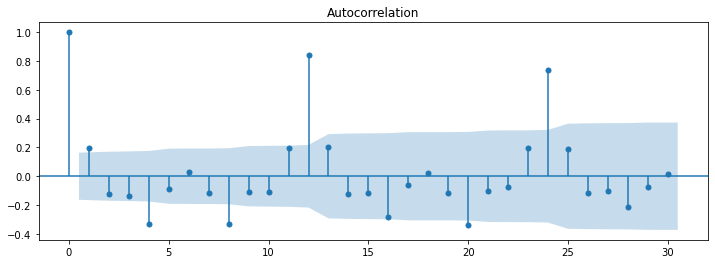

In [18]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12,4))
plot_acf(airline_data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

## PACF Plot

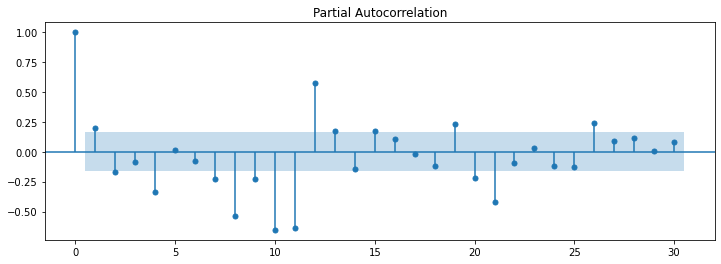

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(airline_data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

> Now two requirements to build an autoregressive model is studied

In [20]:
airline_data['boxcox_transform'] = airline_data_boxcox
airline_data['boxcox_transform_diff_1'] = airline_data_boxcox_diff
airline_data

,Passengers,Passengers_Mean_Imputation,Passengers_Linear_Interpolation,boxcox_transform,boxcox_transform_diff_1
Date,,,,,
1949-01-01,112.0,112.0,112.0,4.718499,NaN
1949-02-01,118.0,118.0,118.0,4.770685,0.052186
1949-03-01,132.0,132.0,132.0,4.882802,0.112117
1949-04-01,129.0,129.0,129.0,4.859812,-0.022990
1949-05-01,121.0,121.0,121.0,4.795791,-0.064022
...,...,...,...,...,...
1960-08-01,606.0,606.0,606.0,6.406880,-0.026060
1960-09-01,508.0,508.0,508.0,6.230481,-0.176399
1960-10-01,461.0,461.0,461.0,6.133398,-0.097083


In [21]:
airline_data.to_csv('../dataset/dataanalysis.csv')